In [3]:
# code in this cell from: 
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to display/hide the code."></form>''')

## Introduction:

In anticipation of the 2022 World Cup in Qatar, this is a summary analysis of the 2018 World Cup. This analysis will be used to predict performance in this upcoming tournament, and so readers will have a better understanding of this years tournament.

## Selection of Data:

This summary will use the raw data sources provided by FBREF, and these data is available at: https://fbref.com/en/comps/1/stats/FIFA-World-Cup-Stats#stats_standard and https://github.com/fghaddar/data-science-final-project/blob/main/scores_fixtures.txt. This project consists of 4 sources of data, all of which add up to 668 rows and 45 features. The 3 source files are called player.csv, team_for, and team_against.

The majority of the data is clean in the sense that most 3 of the data sources do not have null values in any of the rows or columns. However, one data source did have null values in it's rows, and so these rows have been dropped. Additionally, randomly generated letters have been appended to each name of every player in the player.csv file. These random letters are added after a backslash, and so I plan to extract the name before the backslash and used that extracted name to update that row. In addition, the data has some irrelevant features that are not needed for this discussion, and so they have been dropped. They are found within the player.csv file and these features are: Rk, Pos, Born, G-PK, PK, PKatt, and CrdY.

Within the team_against and team_for files, all of the features are numeric except for the Squad name, which is a string. Within the player.csv file all features are numeric except for player name.

The features used as indicators for performance will be several fold. These features and indicators include Goals Scored, Goals Conceded, Expected Goals generated by each team, Expected Assists generated by each team, Expected Goals faced by each team, Expected Assists faced by each team, the average age of the squad at the time, and how many notable performers a subset of teams have. Exoected Goals (A.K.A. xG) is the likelihood of a given shot becoming a goal whilst Expected Assists (A.K.A. xA) is the likelihood of a given pass becoming an assist. Both xG and xA are measured out of a scale 1, where 1 means that the likelihood is a certainity and 0 means that the likelihood is never happening.

## Methods:

#### Tools:

Pandas & Matplotlib for data analysis and visualization

Scikit-learn for inference

Github for version control

VS Code as IDE

Juypter Notebook within Anaconda

In [313]:
import pandas as pd
import matplotlib.pyplot as plt

##### Data Prep/Cleaning

In [315]:
# Read the data, check for NA values, drop irrelevant features
stats_against = pd.read_csv("https://raw.githubusercontent.com/fghaddar/data-science-final-project/main/stats_against.txt")
stats_for = pd.read_csv("https://raw.githubusercontent.com/fghaddar/data-science-final-project/main/stats_for.txt")
player_stats = pd.read_csv("https://raw.githubusercontent.com/fghaddar/data-science-final-project/main/player.txt")
scores = pd.read_csv("https://raw.githubusercontent.com/fghaddar/data-science-final-project/main/scores_fixtures.txt")


# Some non-null values but all headers describe the columns well
# stats_against.info()
# stats_for.info()
# player_stats.info()
# scores.info

# Get rid of non-null values and irrelevant features
stats_against = stats_against.drop(columns=['playing_time 90s', 'performance G-PK', 'performance PK', 'per_90 G-PK'])
stats_for = stats_for.drop(columns=['Playing Time 90s', 'Performance G-PK', 'Performance PK', 'Per 90 Minutes G-PK'])
player_stats = player_stats.drop(columns=['Performance CrdY', 'Performance CrdR'])
scores = scores.drop(columns=['Wk', 'Attendance', 'Venue', 'Match Report', 'Notes', 'Referee'])

# Update scores table so that the Home and Away team names are by ID and not country names
for i in scores.index:
    scores.at[i, "Home"] = scores.at[i, "Home"][-2:]
    scores.at[i, "Away"] = scores.at[i, "Away"][:2]
    
# Update stats_against and stats_for so that the Home and Away team names are by ID and not country names
for i in stats_against.index:
    stats_against.at[i, "Squad"] = stats_against.at[i, "Squad"][:2]
    stats_for.at[i, "Squad"] = stats_for.at[i, "Squad"][:2]

##### lets start by examining the performance of teams that went further into the tournament. Do these teams have higher xG's and xA's than average?

Text(0.5, 1.0, 'Do teams that went further in the tournament have a higher xG + xA?')

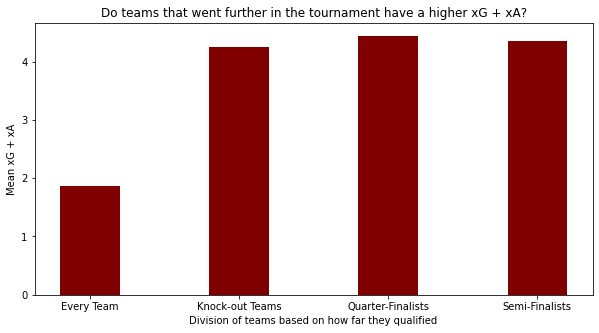

In [317]:
# Get the semi-finalists, quarter-finalists, and teams that qualified from the group stage (r16)
semi_finalists = []
qrtr_finalists = []
r_16 = []
for i in range(4):
    index = -(i + 1)
    semi_finalists += [scores.iloc[index]['Home'], scores.iloc[index]['Away']]
for i in range(8):
    index = -(i + 1)
    qrtr_finalists += [scores.iloc[index]['Home'], scores.iloc[index]['Away']]
for i in range(16):
    index = -(i + 1)
    r_16 += [scores.iloc[index]['Home'], scores.iloc[index]['Away']]

# Get the xG+xA performance of every team
avg_xG_xA_performance = stats_for['Per 90 xG+xA'].mean()
# Get the xG+xA performance of teams that qualified from their groups, quarter_finalists, and semi_finalists
sf_mean = 0
qf_mean = 0
r16_mean = 0
for semi_finalist in semi_finalists:
    index = stats_for.index[stats_for['Squad'] == semi_finalist]
    sf_mean += stats_for.iloc[index[0]]['Per 90 xG+xA']
for qrtr_finalist in qrtr_finalists:
    index = stats_for.index[stats_for['Squad'] == qrtr_finalist]
    qf_mean += stats_for.iloc[index[0]]['Per 90 xG+xA']
for r in r_16:
    index = stats_for.index[stats_for['Squad'] == r]
    r16_mean += stats_for.iloc[index[0]]['Per 90 xG+xA']
sf_mean = sf_mean / 4
qf_mean = qf_mean / 8
r16_mean = r16_mean / 16

data = {'Every Team': avg_xG_xA_performance, 'Knock-out Teams': r16_mean, 'Quarter-Finalists': qf_mean, 'Semi-Finalists': sf_mean}

fig = plt.figure(figsize = (10, 5))
plt.bar(list(data.keys()), list(data.values()), color ='maroon', width = 0.4)
plt.ylabel('Mean xG + xA')
plt.xlabel('Division of teams based on how far they qualified')
plt.title('Do teams that went further in the tournament have a higher xG + xA?')